In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import get_seasonality_trend_overview, plot_period_mean
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('../originalni_datasetovi/train.csv')
df_test = pd.read_csv('../originalni_datasetovi/test.csv')
df_stores = pd.read_csv('../originalni_datasetovi/stores.csv')
df_oil = pd.read_csv('../originalni_datasetovi/oil.csv')
df_holidays = pd.read_csv('../originalni_datasetovi/holidays_events.csv')
df_transactions = pd.read_csv('../originalni_datasetovi/transactions.csv').sort_values(['store_nbr', 'date'])

In [3]:
df_transactions['date'] = pd.to_datetime(df_transactions.date)
df_train['date'] = pd.to_datetime(df_train.date)

In [4]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [6]:
df_train.describe()

,id,date,store_nbr,sales,onpromotion
count,3000888.000,3000888,3000888.000,3000888.000,3000888.000
mean,1500443.500,2015-04-24 08:27:04.703088384,27.500,357.776,2.603
min,0.000,2013-01-01 00:00:00,1.000,0.000,0.000
25%,750221.750,2014-02-26 18:00:00,14.000,0.000,0.000
50%,1500443.500,2015-04-24 12:00:00,27.500,11.000,0.000
75%,2250665.250,2016-06-19 06:00:00,41.000,195.847,0.000
max,3000887.000,2017-08-15 00:00:00,54.000,124717.000,741.000
std,866281.892,NaN,15.586,1101.998,12.219


In [7]:
print(set(df_train.family.to_list()))
len(set(df_train.family.to_list()))

{'AUTOMOTIVE', 'GROCERY I', 'HARDWARE', 'PLAYERS AND ELECTRONICS', 'MAGAZINES', 'BEVERAGES', 'LAWN AND GARDEN', 'SEAFOOD', 'DAIRY', 'DELI', 'PRODUCE', 'BEAUTY', 'LINGERIE', 'BOOKS', 'PET SUPPLIES', 'POULTRY', 'EGGS', 'BABY CARE', 'BREAD/BAKERY', 'CLEANING', 'FROZEN FOODS', 'HOME AND KITCHEN II', 'PERSONAL CARE', 'CELEBRATION', 'MEATS', 'SCHOOL AND OFFICE SUPPLIES', 'HOME AND KITCHEN I', 'PREPARED FOODS', 'GROCERY II', 'HOME CARE', 'LIQUOR,WINE,BEER', 'LADIESWEAR', 'HOME APPLIANCES'}


33

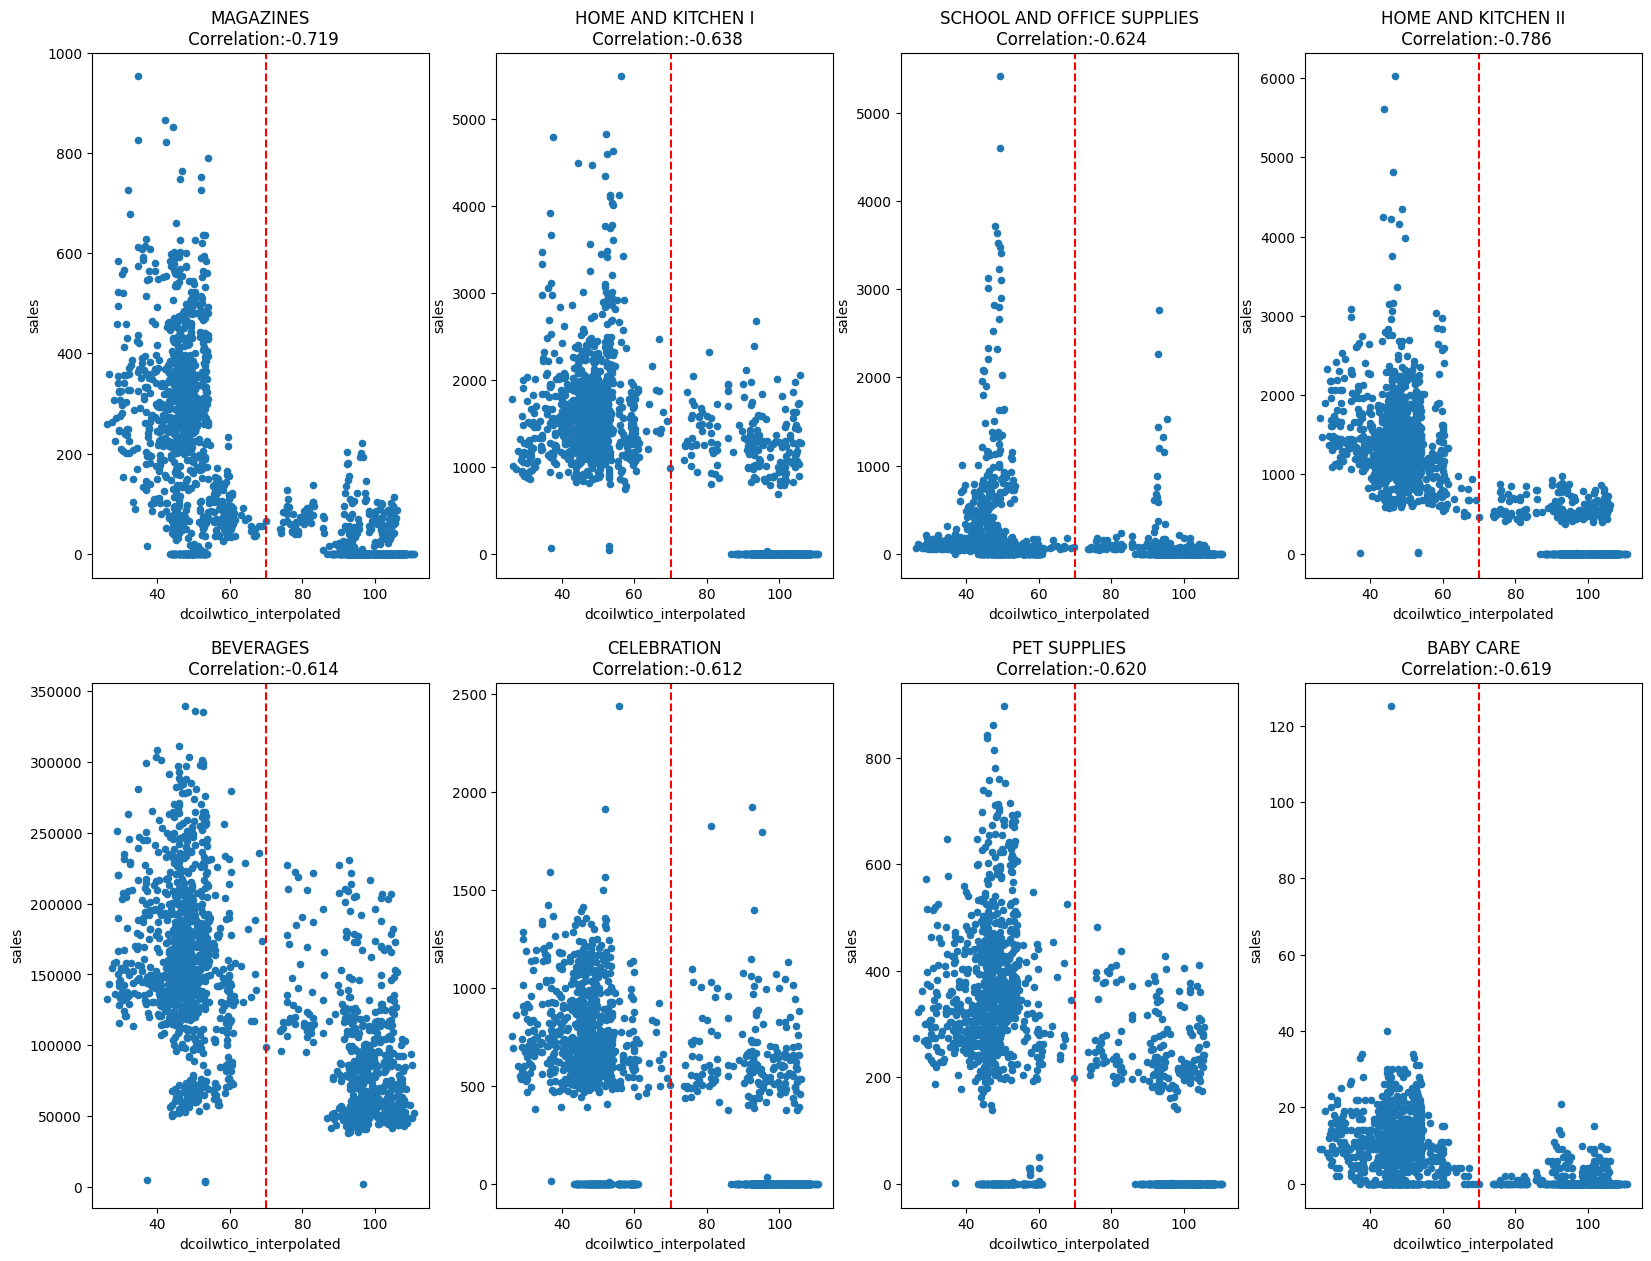

In [8]:
oil = pd.read_csv('../originalni_datasetovi/oil.csv')
oil['date'] = pd.to_datetime(oil.date)

# Resample -> index is now date and if there is entry missing for some date it will be 0 for oil_prices
oil = oil.set_index('date').dcoilwtico.resample('D').sum().reset_index()

# Interpolate
oil['dcoilwtico'] = np.where(oil['dcoilwtico'] == 0, np.nan, oil['dcoilwtico'])
oil['dcoilwtico_interpolated'] = oil.dcoilwtico.interpolate()

# merge train data and oil data
a = pd.merge(df_train.groupby(['date', 'family']).sales.sum().reset_index(), oil.drop('dcoilwtico', axis = 1), how = 'left')
c = a.groupby('family').corr('spearman').reset_index()
c = c[c.level_1 == 'dcoilwtico_interpolated'][['family', 'sales']].sort_values('sales')

# extract only statisticaly significant correlations
df_significant_corelation = c[(c['sales'] >= 0.6) | (c['sales'] <= -0.6)]
df_significant_corelation

# we make 2x4 matrix of plots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
for i, family in enumerate(df_significant_corelation.family):
    if i < 4:
         a[a.family == family].plot.scatter(x = 'dcoilwtico_interpolated', y = 'sales', ax=axes[0, i-1])
         axes[0, i-1].set_title(family+'\n Correlation:'+str(df_significant_corelation[df_significant_corelation.family == family].sales.iloc[0])[:6], fontsize = 12)
         axes[0, i-1].axvline(x=70, color='r', linestyle='--')
    else:
         a[a.family == family].plot.scatter(x = 'dcoilwtico_interpolated', y = 'sales', ax=axes[1, i-6])
         axes[1, i-6].set_title(family+'\n Correlation:'+str(df_significant_corelation[df_significant_corelation.family == family].sales.iloc[0])[:6], fontsize = 12)
         axes[1, i-6].axvline(x=70, color='r', linestyle='--')

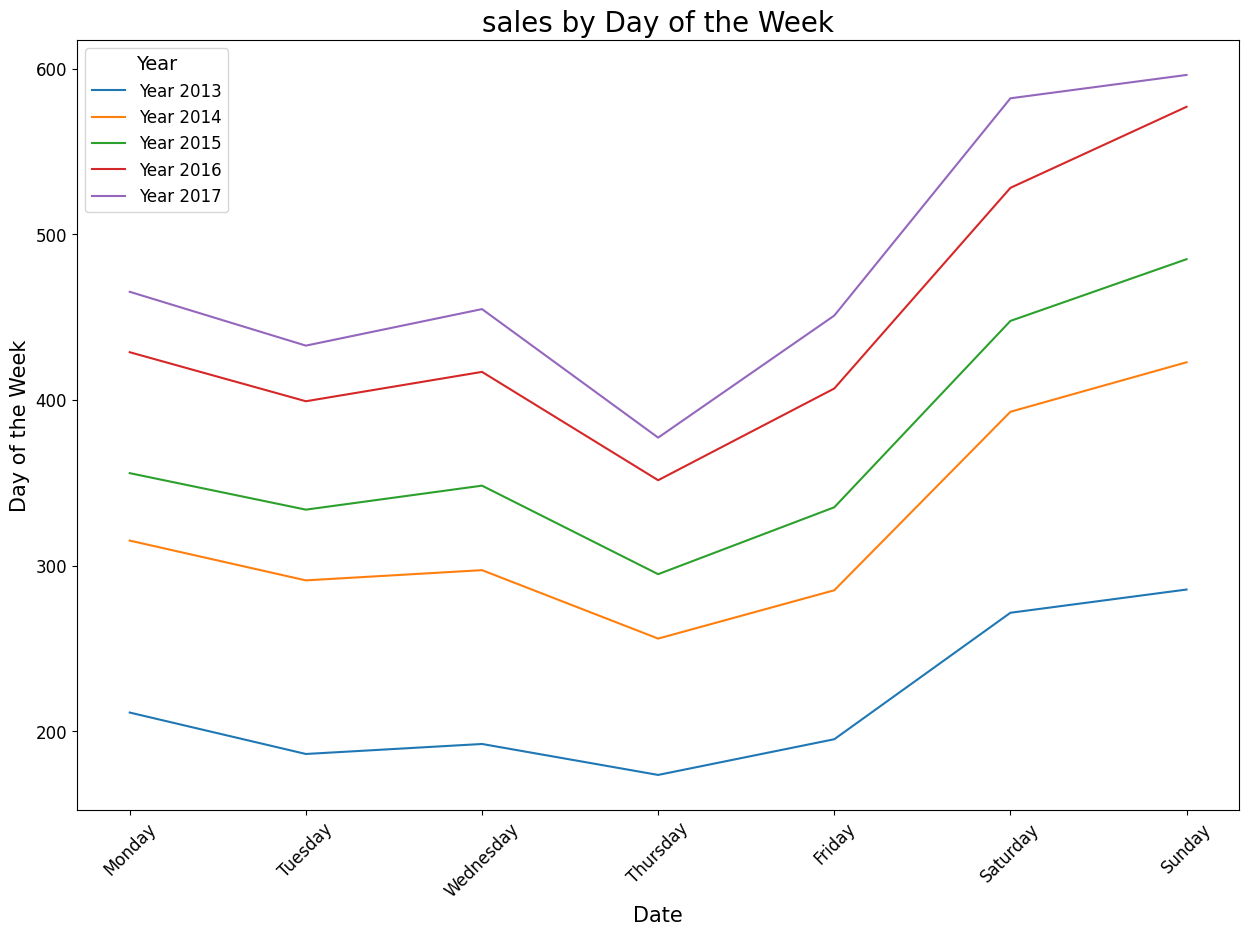

In [9]:
plot_period_mean(df_train, 'sales', period='DW')

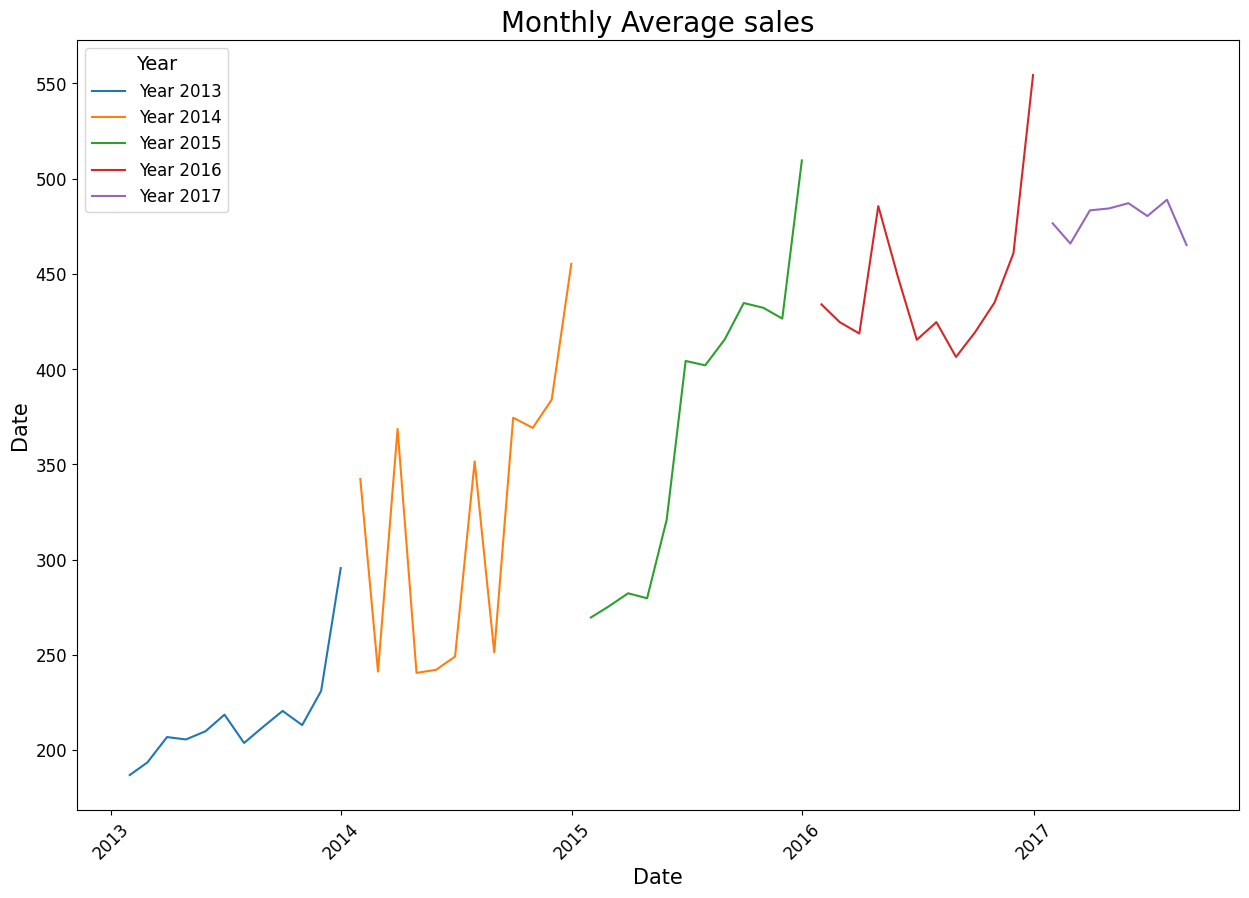

In [10]:
plot_period_mean(df_train, 'sales', period='M')

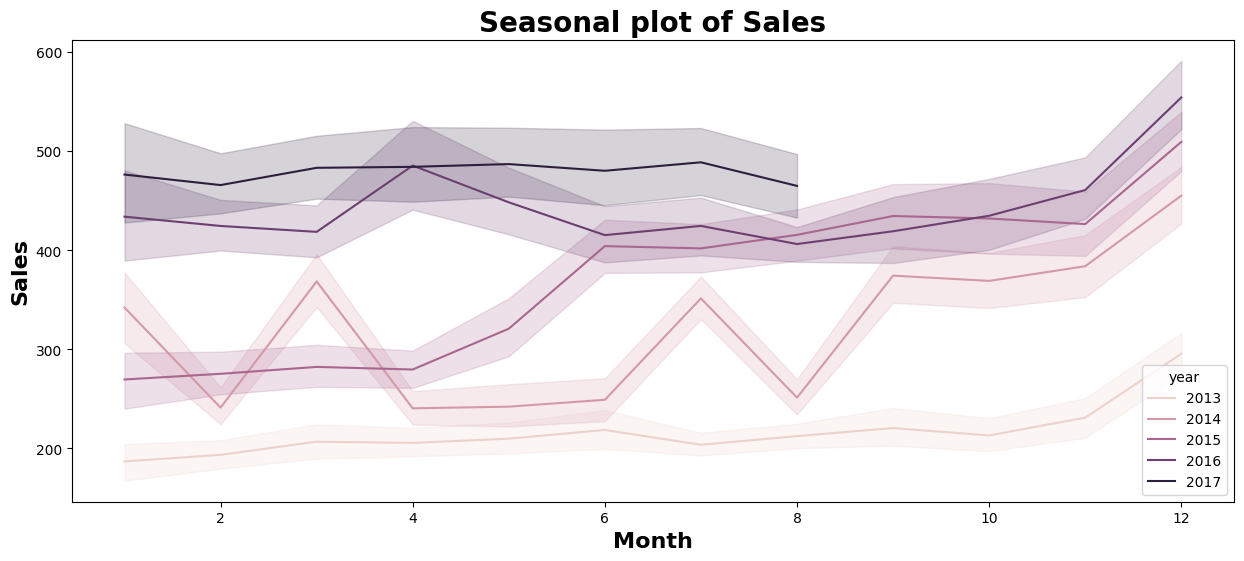

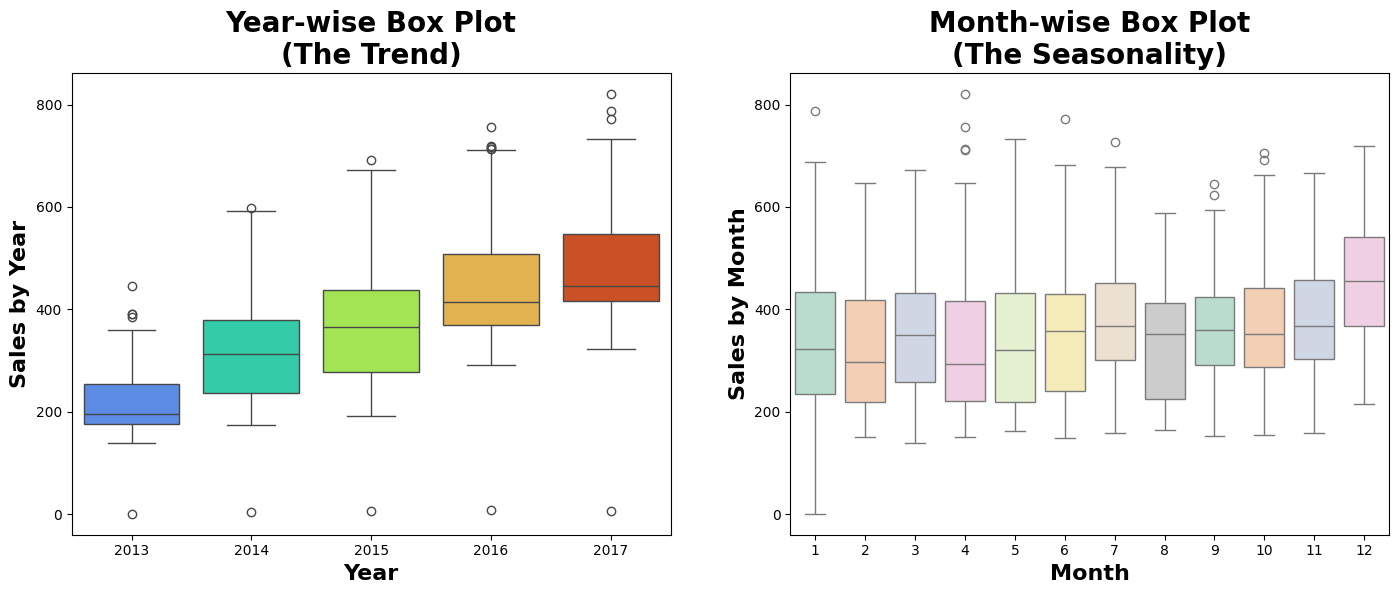

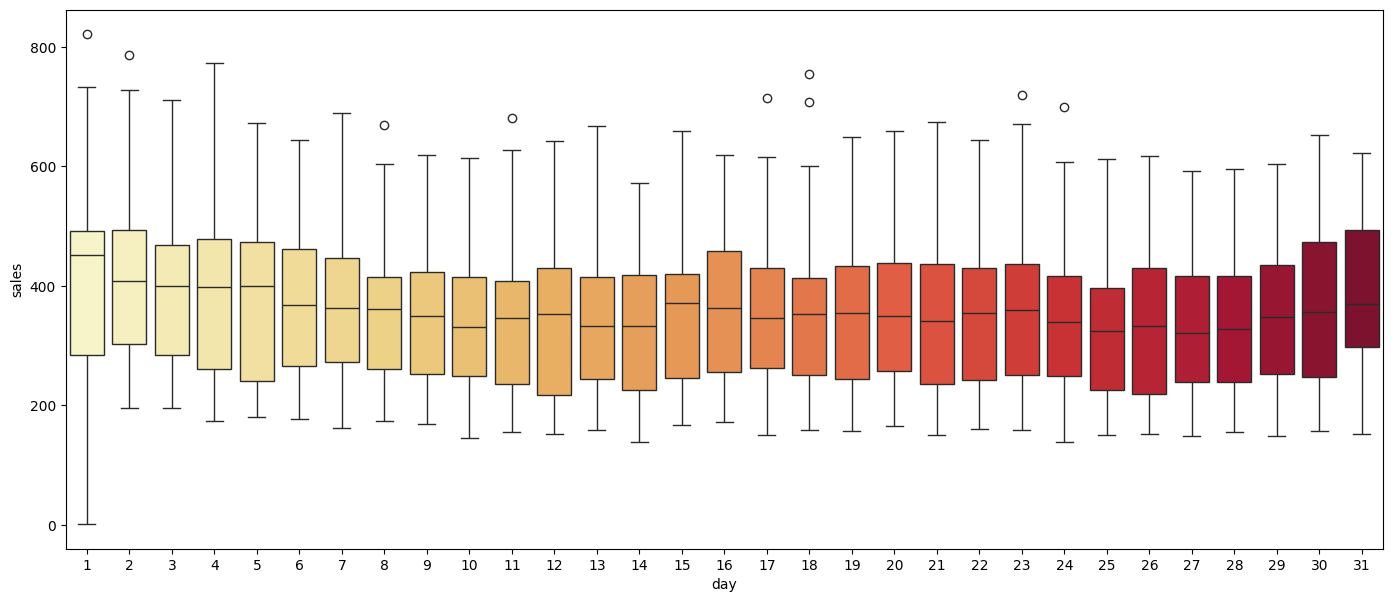

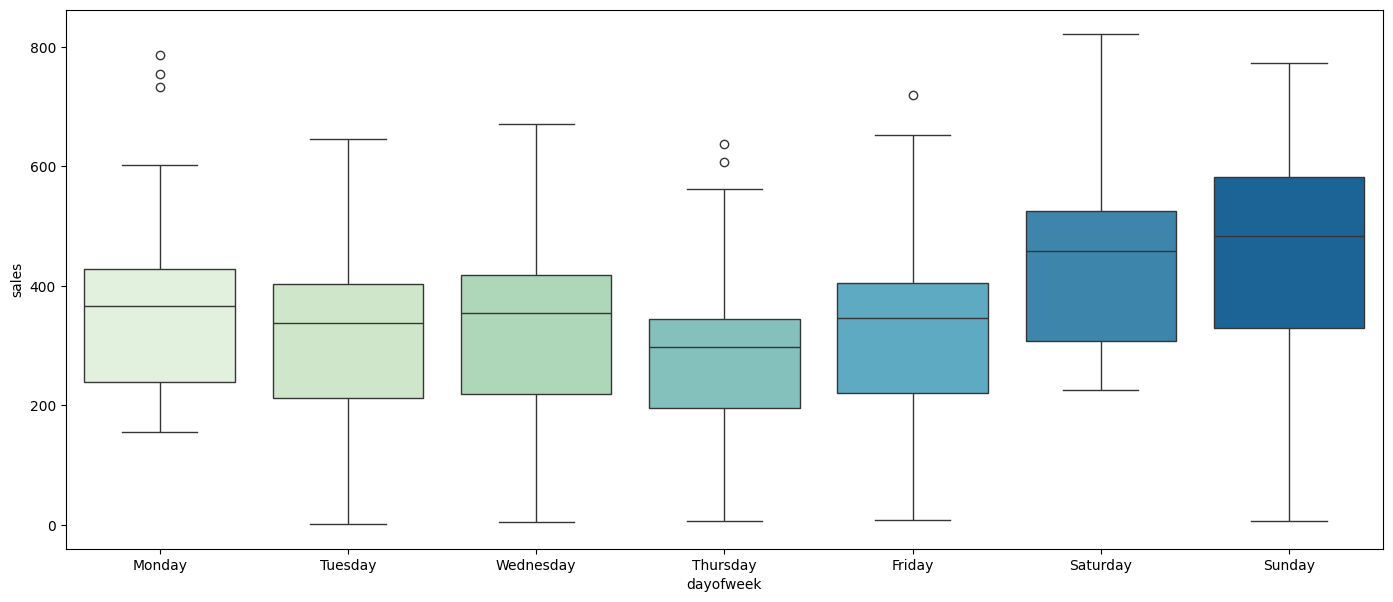

In [11]:
get_seasonality_trend_overview(df_train.drop(columns='family'), 'sales', 'Sales')